In [34]:
import nibabel as nb
import numpy as np
import scipy
from scipy import stats
import math
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [35]:
file_path = 'E:/FPP_files_and_codes/FPP_files/relabeled_seconds/corrected_GPT_labeling/final_labels.csv'

RelabelDataframe = pd.read_csv(file_path)

In [36]:
RelabelDictionary = {}
for index, row in RelabelDataframe.iterrows():
    if index != 0:
        RelabelDictionary[row['prv_label']] = row['new_label']
RelabelDictionary[''] = float('nan')

In [37]:
labels_list_1 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie1_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_1.append(labels)
labels_list_2 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie2_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_2.append(labels)
labels_list_3 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie3_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_3.append(labels)
labels_list_4 = []
with open("E:/FPP_files_and_codes/FPP_files/HCP_movie_labels/Movie_labels/Movie4_labels.txt",'r') as file:
    for line in file:
        labels = line.strip().split(',')
        labels_list_4.append(labels)
labels_list = labels_list_1 + labels_list_2 + labels_list_3  + labels_list_4
print(len(labels_list))

3655


In [38]:
RelabeldFrames = [set() for i in range(3655)]
for i in range(3655):
    for j in labels_list[i]:
        RelabeldFrames[i].add(str(RelabelDictionary[j]))

In [39]:
P_AFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and ('Animal' not in i) and ('Face' not in i) and ('Body' not in i)):
        P_AFB.append(k)
    k += 1
print(len(P_AFB))

566


In [40]:
PAFB = []
k = 0
for i in RelabeldFrames:
    if (('Place' in i) and( ('Animal' in i) or ('Face' in i) or ('Body' in i))):
        PAFB.append(k)
#         print(i)
    k += 1
print(len(PAFB))

1945


In [41]:
AFB = []
k = 0
for i in RelabeldFrames:
    if  ('Animal' in i) or ('Face' in i) or ('Body' in i):
        AFB.append(k)
#         print(i)
    k += 1
print(len(AFB))

2451


In [42]:
eye_data = scipy.io.loadmat('E:/FPP_files_and_codes/FPP_files/eye_movment_data/final162.mat')

In [43]:
eye_data = eye_data['final162']

In [44]:
eye_data = eye_data.squeeze(0)

In [45]:
eye_data.shape

(3655,)

In [46]:
eye_movement_P_AFB = eye_data[P_AFB]
eye_movement_PAFB = eye_data[PAFB]
eye_movement_AFB = eye_data[AFB]

In [47]:
eye_movement_PAFB.shape

(1945,)

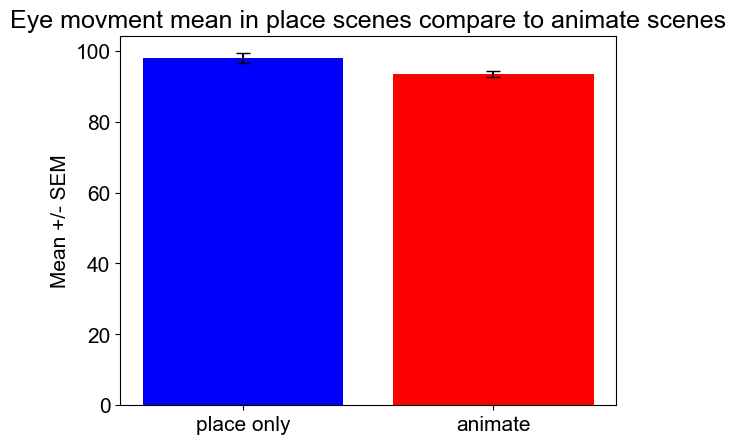

In [48]:
means_place = [np.mean(eye_movement_P_AFB), np.mean(eye_movement_AFB)]

# Calculate the SEMs
sems_place = [np.std(eye_movement_P_AFB) / np.sqrt(len(eye_movement_P_AFB)), 
              np.std(eye_movement_PAFB) / np.sqrt(len(eye_movement_PAFB))]

# Plotting
x_labels = ['place only', 'animate']
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
bars = ax.bar(x, means_place, yerr=sems_place, capsize=5, color=['blue', 'red'])

# Add labels
# ax.set_xlabel('scene with place or')
ax.set_ylabel('Mean +/- SEM')
ax.set_title('Eye movment mean in place scenes compare to animate scenes')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

plt.show()

In [49]:
regressor_scene_transitions = np.load('E:/FPP_files_and_codes/FPP_files/scene_transition/regressor_absdif_intensity_pixels/regressor_mean_maxdif_pixel_intensitiy.npy')

In [50]:
regressor_scene_transitions_binarized = regressor_scene_transitions>np.mean(regressor_scene_transitions)

In [51]:
regressor_scene_transitions_binarized

array([False, False, False, ..., False, False, False])

In [52]:
eye_movment_in_transitions = eye_data[regressor_scene_transitions_binarized]
eye_movment_not_in_transitions = eye_data[~regressor_scene_transitions_binarized]

In [53]:
eye_movment_in_transitions.shape

(1032,)

In [54]:
eye_movment_not_in_transitions.shape

(2623,)

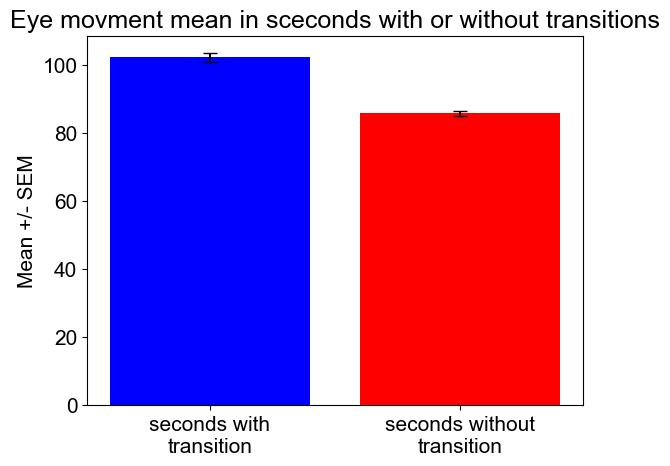

In [55]:
means_transition = [np.mean(eye_movment_in_transitions), np.mean(eye_movment_not_in_transitions)]

# Calculate the SEMs
sems_transition = [np.std(eye_movment_in_transitions) / np.sqrt(len(eye_movment_in_transitions)), 
        np.std(eye_movment_not_in_transitions) / np.sqrt(len(eye_movment_not_in_transitions))]

# Plotting
x_labels = ['seconds with\ntransition', 'seconds without\ntransition']
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
bars = ax.bar(x, means_transition, yerr=sems_transition, capsize=5, color=['blue', 'red'])

ax.set_ylabel('Mean +/- SEM')
ax.set_title('Eye movment mean in sceconds with or without transitions')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

plt.show()

In [56]:
regressor_mean_magnitude_motion_vectors = np.load('E:/FPP_files_and_codes/FPP_files/dense_optical_flow_vectors/mean_magnitude_vectors_in_each_second.npy')

In [57]:
regressor_mean_magnitude_motion_vectors_binarized = (regressor_mean_magnitude_motion_vectors>np.mean(regressor_mean_magnitude_motion_vectors))

In [58]:
regressor_mean_magnitude_motion_vectors_binarized.sum()

1090

In [59]:
eye_movment_in_high_motions = eye_data[regressor_mean_magnitude_motion_vectors_binarized]
eye_movment_not_high_motions = eye_data[~regressor_mean_magnitude_motion_vectors_binarized]

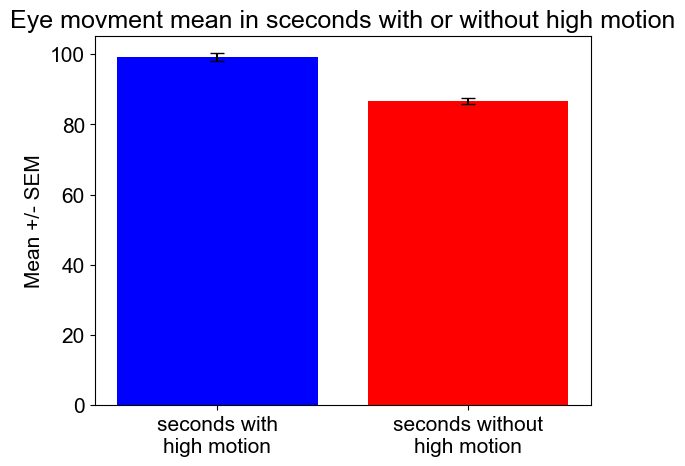

In [60]:
means_motion = [np.mean(eye_movment_in_high_motions), np.mean(eye_movment_not_high_motions)]

# Calculate the SEMs
sems_motion = [np.std(eye_movment_in_high_motions) / np.sqrt(len(eye_movment_in_high_motions)), 
        np.std(eye_movment_not_high_motions) / np.sqrt(len(eye_movment_not_high_motions))]

# Plotting
x_labels = ['seconds with\nhigh motion', 'seconds without\nhigh motion']
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
bars = ax.bar(x, means_motion, yerr=sems_motion, capsize=5, color=['blue', 'red'])

ax.set_ylabel('Mean +/- SEM')
ax.set_title('Eye movment mean in sceconds with or without high motion')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)

plt.show()

In [61]:
means_motion

[99.17904406016856, 86.64226260380396]

In [62]:
means_transition

[102.1071025200032, 85.76745398539748]

In [63]:
means_place

[97.96317325817677, 93.52175709378506]

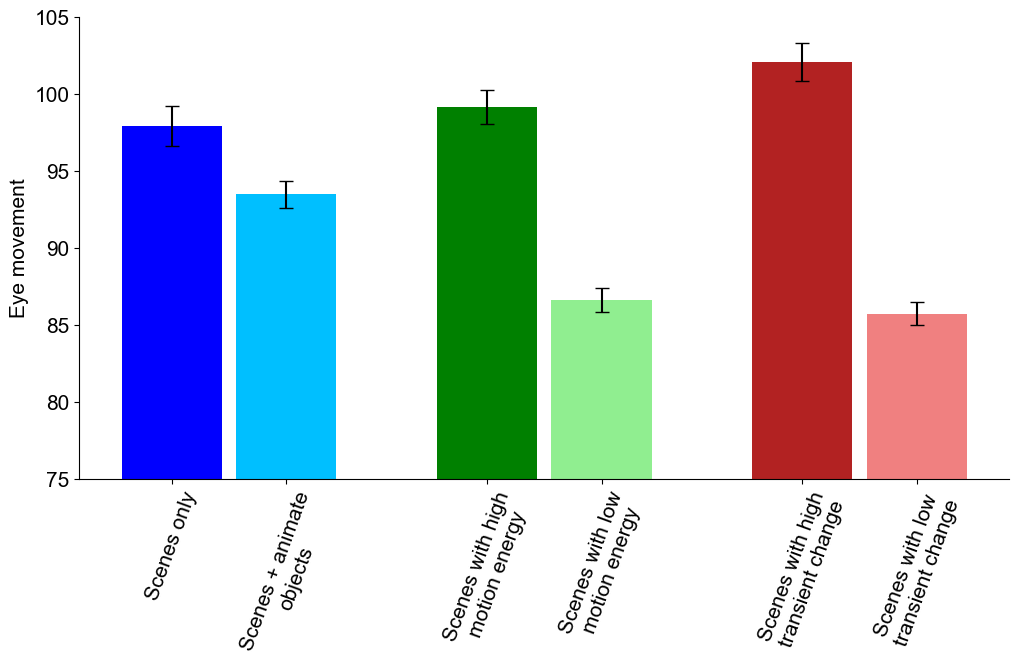

In [72]:
import matplotlib.pyplot as plt
import numpy as np

bar_labels = [
    'Scenes only',
    'Scenes + animate\nobjects',
    'Scenes with high\nmotion energy',  
    'Scenes with low\nmotion energy',
    'Scenes with high\ntransient change', 
    'Scenes with low\ntransient change'
]

bar_width = 0.35
group_gap = 1.1
bar_gap = 0.05  

data = [
    means_place,
    means_motion,  
    means_transition
]
SEMs = [
    sems_place,
    sems_motion,
    sems_transition
]


num_groups = len(data)
num_bars = len(data[0])


group_positions = np.arange(num_groups) * group_gap
fig, ax = plt.subplots(figsize=(12, 6))

plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Arial'


# Colors for each group
group_colors = ['blue', 'green', 'firebrick']
pale_colors = ['deepskyblue', 'lightgreen', 'lightcoral']

# Plot each bar group
bar_positions = []
for j in range(num_groups):
    for i in range(num_bars):
        bar_position = group_positions[j] + i * (bar_width + bar_gap)
        color = group_colors[j] if i == 0 else pale_colors[j]
        ax.bar(bar_position, data[j][i], bar_width,yerr=SEMs[j][i],capsize=5, color=color)
        bar_positions.append(bar_position)

# Set the x-ticks to each bar's position
ax.set_xticks(bar_positions)
ax.set_xticklabels(bar_labels,rotation=70)
ax.set_ylabel('Eye movement')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(75,105)

plt.savefig('E:/FPP_files_and_codes/Figures/Supplementary_Figure2/difference_eyemovement.png', dpi=1200, bbox_inches='tight')
plt.show()


In [33]:
means_motion

[99.17904406016856, 86.64226260380396]